<a href="https://colab.research.google.com/github/npto04/analise_NBA_com_pandas/blob/main/2NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALLATIONS & IMPORTS

In [ ]:
pip install pandera

     |████████████████████████████████| 197 kB 23.5 MB/s 
     |████████████████████████████████| 10.9 MB 43.8 MB/s 


In [ ]:
pip install google-cloud-translate==2.0.1

     |████████████████████████████████| 90 kB 7.4 MB/s 
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 1.0.3
    Uninstalling google-cloud-core-1.0.3:
      Successfully uninstalled google-cloud-core-1.0.3
  Attempting uninstall: google-cloud-translate
    Found existing installation: google-cloud-translate 1.5.0
    Uninstalling google-cloud-translate-1.5.0:
      Successfully uninstalled google-cloud-translate-1.5.0


In [ ]:
pip install --upgrade google-auth-oauthlib

  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.8.0 requires google-auth-oauthlib<0.5,>=0.4.1, but you have google-auth-oauthlib 0.5.0 which is incompatible.


In [ ]:
import pandas as pd
import pandera as pa
import matplotlib.pyplot as plt

#LER DATASET

In [ ]:
URL_PATH = 'https://storage.googleapis.com/dados_brutos_soulcode/original/2NBA.csv'

In [ ]:
df = pd.read_csv(URL_PATH, encoding='latin1', sep=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      734 non-null    int64  
 1   Player  734 non-null    object 
 2   Pos     734 non-null    object 
 3   Age     734 non-null    int64  
 4   Tm      734 non-null    object 
 5   G       734 non-null    int64  
 6   GS      734 non-null    int64  
 7   MP      734 non-null    float64
 8   FG      734 non-null    float64
 9   FGA     734 non-null    float64
 10  FG%     734 non-null    float64
 11  3P      734 non-null    float64
 12  3PA     734 non-null    float64
 13  3P%     734 non-null    float64
 14  2P      734 non-null    float64
 15  2PA     734 non-null    float64
 16  2P%     734 non-null    float64
 17  eFG%    734 non-null    float64
 18  FT      734 non-null    float64
 19  FTA     734 non-null    float64
 20  FT%     734 non-null    float64
 21  ORB     734 non-null    float64
 22  DR

#Pré-análise de dados

##Siglas (em inglês) para as colunas:

Rk : Rank

Player : Player's name

Pos : Position

Age : Player's age

Tm : Team

G : Games played

GS : Games started

MP : Minutes played per game

FG : Field goals per game

FGA : Field goal attempts per game

FG% : Fiel goal percentage

3P : 3-point field goals per game

3PA : 3-point field goal attempts per game

3P% : 3-point field goal percentage

2P : 2-point field goals per game

2PA : 2-point field goal attempts per game

2P% : 2-point field goal percentage

eFG% : Effective field goal percentage

FT : Free throws per game

FTA : Free throw attempts per game

FT% : Free throw percentage

ORB : Offensive rebounds per game

DRB : Defensive rebounds per game

TRB : Total rebounds per game

AST : Assists per game

STL : Steals per game

BLK : Blocks per game

TOV : Turnovers per game

PF : Personal fouls per game

PTS : Points per game

##Dropando colunas com dados derivados

In [ ]:
df.drop(['FG','FGA','FG%','FT%','3P%','2P%','TRB','eFG%'], axis=1,inplace=True)

##Renomear siglas para seus verdadeiros significados

In [ ]:
nomes_colunas ={
'Rk' : 'Rank',

'Player' : 'Player\'s name',

'Pos' : 'Position',

'Age' : 'Player\'s age',

'Tm' : 'Team',

'G' : 'Games played',

'GS' : 'Games started',

'MP' : 'Minutes played per game',

'3P' : '3-point field goals per game',

'3PA' : '3-point field goal attempts per game',

'2P' : '2-point field goals per game',

'2PA' : '2-point field goal attempts per game',

'FT' : 'Free throws per game',

'FTA' : 'Free throw attempts per game',

'ORB' : 'Offensive rebounds per game',

'DRB' : 'Defensive rebounds per game',

'AST' : 'Assists per game',

'STL' : 'Steals per game',

'BLK' : 'Blocks per game',

'TOV' : 'Turnovers per game',

'PF' : 'Personal fouls per game',

'PTS' : 'Points per game'
}

In [ ]:
df.rename(columns=nomes_colunas, inplace=True)

##Tradução da tabela do inglês ao português

https://bolapresa.com.br/entenda-os-termos-do-basquete-da-nba/

https://lakersbr.wordpress.com/dicionario-da-nba/

In [ ]:
df_en = df.copy()

In [ ]:
from google_auth_oauthlib import flow

# TODO: Uncomment the line below to set the `launch_browser` variable.
launch_browser = False
#
# The `launch_browser` boolean variable indicates if a local server is used
# as the callback URL in the auth flow. A value of `True` is recommended,
# but a local server does not work if accessing the application remotely,
# such as over SSH or from a remote Jupyter notebook.
# Credential https://drive.google.com/file/d/1--SAW8n7r04Y_I4sDod_tmF-tLMKyts3/view?usp=sharing
appflow = flow.InstalledAppFlow.from_client_secrets_file(
    "/content/drive/MyDrive/credentials/client_secret_401243953494-2o43sf7nuk639m84khbg3dpvlsv027v1.apps.googleusercontent.com.json", scopes=["https://www.googleapis.com/auth/cloud-translation"]
)

if launch_browser:
    appflow.run_local_server()
else:
    appflow.run_console()

credentials = appflow.credentials

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=401243953494-2o43sf7nuk639m84khbg3dpvlsv027v1.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-translation&state=GM0KzIALcwyhv2sULSbTSGCIDg74kV&prompt=consent&access_type=offline
Enter the authorization code: 4/1AX4XfWgNg1ti4xJz4ei-G78Cyr6A0iDDQPFC4kR6lcpSQz2xhWbQLvW-fmg


In [ ]:
def translate_text(target, text):
    """Translates text into the target language.

    Target must be an ISO 639-1 language code.
    See https://g.co/cloud/translate/v2/translate-reference#supported_languages
    """
    import six
    from google.cloud import translate_v2 as translate

    translate_client = translate.Client(credentials=credentials)

    if isinstance(text, six.binary_type):
        text = text.decode("utf-8")

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    result = translate_client.translate(text, target_language=target)

    #print(u"Text: {}".format(result["input"]))
    #print(u"Translation: {}".format(result["translatedText"]))
    #print(u"Detected source language: {}".format(result["detectedSourceLanguage"]))
    return result["translatedText"]

In [ ]:
translate_text('pt', 'Hello world!')

'Olá Mundo!'

In [ ]:
# traduz nomes das colunas usando função rename
df.rename(columns= lambda x: translate_text('pt',x), inplace=True)

## Corrigindo equivocos do tradutor

In [ ]:
df.columns

Index(['Classificação', 'Nome do jogador', 'Posição', 'Idade do jogador',
       'Equipe', 'Jogos jogados', 'Jogos iniciados',
       'Minutos jogados por jogo', 'Field goals de 3 pontos por jogo',
       'Tentativas de arremesso de campo de 3 pontos por jogo',
       'Field goals de 2 pontos por jogo',
       'Tentativas de arremesso de campo de 2 pontos por jogo',
       'Lances livres por jogo', 'Tentativas de lance livre por jogo',
       'Rebotes ofensivos por jogo', 'Rebotes defensivos por jogo',
       'Assistências por jogo', 'Roubos por jogo', 'Blocos por jogo',
       'Volume de negócios por jogo', 'Faltas pessoais por jogo',
       'Pontos por jogo'],
      dtype='object')

In [ ]:
df.rename(columns= lambda s: s.replace("Field goals","Arremesso de quadra"), inplace=True)

In [ ]:
df.rename(columns= lambda s: s.replace("campo","quadra"), inplace=True)

In [ ]:
df.rename(columns={"Blocos por jogo": "Tocos por jogo", "Volume de negócios por jogo":"Bolas desperdiçadas por jogo"}, inplace=True )

##Ajustando espaçoes entre os nomes das colunas

In [ ]:
df.rename(columns= lambda s: s.replace(" ", "_"), inplace=True)

In [ ]:
df.columns

Index(['Classificação', 'Nome_do_jogador', 'Posição', 'Idade_do_jogador',
       'Equipe', 'Jogos_jogados', 'Jogos_iniciados',
       'Minutos_jogados_por_jogo', 'Arremesso_de_quadra_de_3_pontos_por_jogo',
       'Tentativas_de_arremesso_de_quadra_de_3_pontos_por_jogo',
       'Arremesso_de_quadra_de_2_pontos_por_jogo',
       'Tentativas_de_arremesso_de_quadra_de_2_pontos_por_jogo',
       'Lances_livres_por_jogo', 'Tentativas_de_lance_livre_por_jogo',
       'Rebotes_ofensivos_por_jogo', 'Rebotes_defensivos_por_jogo',
       'Assistências_por_jogo', 'Roubos_por_jogo', 'Tocos_por_jogo',
       'Bolas_desperdiçadas_por_jogo', 'Faltas_pessoais_por_jogo',
       'Pontos_por_jogo'],
      dtype='object')

#Tratamentos de Dados

In [ ]:
# criação do Schema de dados


schema = pa.DataFrameSchema(
    columns = {
        "Classificação":pa.Column(pa.Int),
        "Nome_do_jogador":pa.Column(pa.String),
        "Posição":pa.Column(pa.String),
        "Idade_do_jogador":pa.Column(pa.Int),
        "Equipe":pa.Column(pa.String),
        "Jogos_jogados":pa.Column(pa.Int),
        "Jogos_iniciados":pa.Column(pa.Int),
        "Minutos_jogados_por_jogo":pa.Column(pa.Float),
        "Arremesso_de_quadra_de_3_pontos_por_jogo":pa.Column(pa.Float),
        "Arremesso_de_quadra_de_2_pontos_por_jogo":pa.Column(pa.Float),
        "Tentativas_de_arremesso_de_quadra_de_3_pontos_por_jogo":pa.Column(pa.Float),
        "Tentativas_de_arremesso_de_quadra_de_2_pontos_por_jogo":pa.Column(pa.Float),
        "Lances_livres_por_jogo": pa.Column(pa.Float),
        "Tentativas_de_lance_livre_por_jogo": pa.Column(pa.Float),
        "Rebotes_ofensivos_por_jogo": pa.Column(pa.Float),
        "Rebotes_defensivos_por_jogo":pa.Column(pa.Float),
        "Assistências_por_jogo":pa.Column(pa.Float),
        "Roubos_por_jogo":pa.Column(pa.Float),
        "Tocos_por_jogo":pa.Column(pa.Float),
        "Bolas_desperdiçadas_por_jogo":pa.Column(pa.Float),
        "Faltas_pessoais_por_jogo":pa.Column(pa.Float),
        "Pontos_por_jogo":pa.Column(pa.Float)
    }
)

In [ ]:
#Validador do DataFrame baseado no Schema
schema.validate(df)

,Classificação,Nome_do_jogador,Posição,Idade_do_jogador,Equipe,Jogos_jogados,Jogos_iniciados,Minutos_jogados_por_jogo,Arremesso_de_quadra_de_3_pontos_por_jogo,Tentativas_de_arremesso_de_quadra_de_3_pontos_por_jogo,...,Lances_livres_por_jogo,Tentativas_de_lance_livre_por_jogo,Rebotes_ofensivos_por_jogo,Rebotes_defensivos_por_jogo,Assistências_por_jogo,Roubos_por_jogo,Tocos_por_jogo,Bolas_desperdiçadas_por_jogo,Faltas_pessoais_por_jogo,Pontos_por_jogo
0,1,Precious Achiuwa,C,22,TOR,48,23,23.1,0.4,1.2,...,0.9,1.6,2.2,4.7,1.1,0.5,0.6,1.0,2.0,7.5
1,2,Steven Adams,C,28,MEM,56,55,26.1,0.0,0.0,...,1.5,2.7,4.5,5.1,3.2,0.9,0.7,1.6,1.9,7.0
2,3,Bam Adebayo,C,24,MIA,33,33,33.0,0.0,0.1,...,4.4,5.8,2.8,7.4,3.5,1.5,0.6,2.9,3.2,18.7
3,4,Santi Aldama,PF,21,MEM,27,0,10.3,0.1,1.4,...,0.4,0.7,0.9,1.5,0.5,0.1,0.3,0.3,1.0,3.3
4,5,LaMarcus Aldridge,C,36,BRK,38,11,22.8,0.3,1.0,...,1.7,2.0,1.6,4.2,0.8,0.3,1.1,1.0,1.7,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,588,Thaddeus Young,PF,33,TOR,2,0,16.5,0.0,1.0,...,0.0,0.5,2.0,2.5,1.0,1.0,0.5,1.5,1.5,7.0
730,589,Trae Young,PG,23,ATL,53,53,34.4,3.0,7.8,...,6.2,6.9,0.6,3.2,9.3,1.0,0.1,4.1,1.6,27.8
731,590,Omer Yurtseven,C,23,MIA,41,10,14.1,0.0,0.2,...,0.8,1.3,1.7,4.2,1.0,0.4,0.4,0.9,1.7,6.1
732,591,Cody Zeller,C,29,POR,27,0,13.1,0.0,0.1,...,1.4,1.8,1.9,2.8,0.8,0.3,0.2,0.7,2.1,5.2


# ANÁLISE 1

POSIÇÕES:

C: Pivô,
PF: Ala-pivô,
SG: Ala-armador,
PG: Armador,
SF: Ala,

Retirar time TOT, que é repetição de outros (consolidação)

In [ ]:
#filtro
sem_equipe_TOT = df.Equipe != 'TOT'

In [ ]:
sum_arremesso_3_pontos_por_posicao = df.loc[sem_equipe_TOT].groupby(["Posição"])['Arremesso_de_quadra_de_3_pontos_por_jogo'].sum()
sum_arremesso_3_pontos_por_posicao_normalizado = sum_arremesso_3_pontos_por_posicao.mul(3)

In [ ]:
sum_arremesso_2_pontos_por_posicao = df.loc[sem_equipe_TOT].groupby(["Posição"])['Arremesso_de_quadra_de_2_pontos_por_jogo'].sum()
sum_arremesso_2_pontos_por_posicao_normalizado = sum_arremesso_2_pontos_por_posicao.mul(2)

In [ ]:
sum_pontos_por_posicao = sum_arremesso_2_pontos_por_posicao_normalizado.add(sum_arremesso_3_pontos_por_posicao_normalizado)

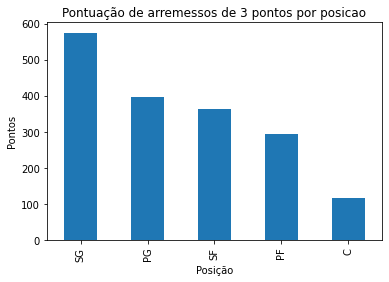

In [ ]:
sum_arremesso_3_pontos_por_posicao_normalizado[['C','SG','PF','PG','SF']].sort_values(ascending=False).plot.bar(title="Pontuação de arremessos de 3 pontos por posicao",ylabel="Pontos")

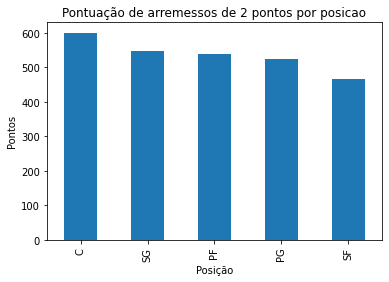

In [ ]:
sum_arremesso_2_pontos_por_posicao_normalizado[['C','SG','PF','PG','SF']].sort_values(ascending=False).plot.bar(title="Pontuação de arremessos de 2 pontos por posicao",ylabel="Pontos")

In [ ]:
sum_pontos_por_posicao[['C','SG','PF','PG','SF']].sort_values(ascending=False)

Posição
SG    1121.9
PG     921.6
PF     833.3
SF     830.9
C      717.2
dtype: float64

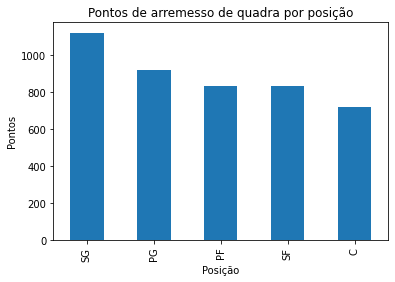

In [ ]:
sum_pontos_por_posicao[['C','SG','PF','PG','SF']].sort_values(ascending=False).plot.bar(title="Pontos de arremesso de quadra por posição", ylabel="Pontos")

Ala-armadores (SG) tem pontuações bem maiores que outras posições. Confirma-se, portanto, como os especialistas em arremessos de quadra.

# ANÁLISE 2

Retirar time TOT, que é repetição de outros (consolidação)

In [ ]:
toco = df.loc[sem_equipe_TOT].groupby(['Nome_do_jogador'])[['Tocos_por_jogo','Faltas_pessoais_por_jogo']].mean()

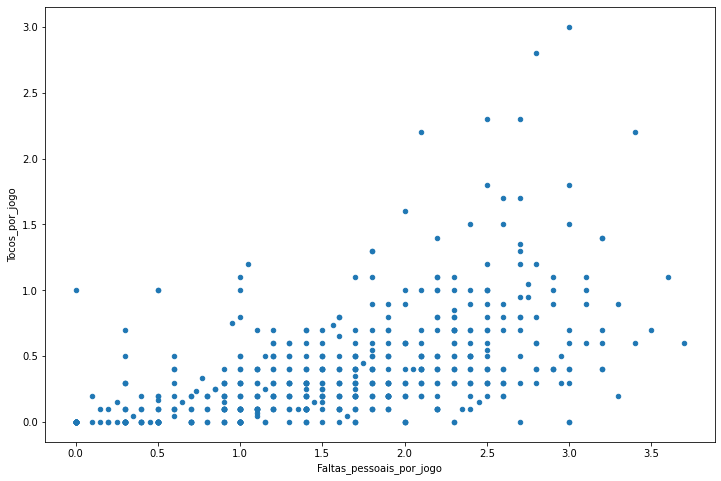

In [ ]:
toco.plot.scatter(figsize=(12,8), y='Tocos_por_jogo', x='Faltas_pessoais_por_jogo')

In [ ]:
roubos = df.loc[sem_equipe_TOT].groupby(['Nome_do_jogador'])[['Roubos_por_jogo','Faltas_pessoais_por_jogo']].mean()

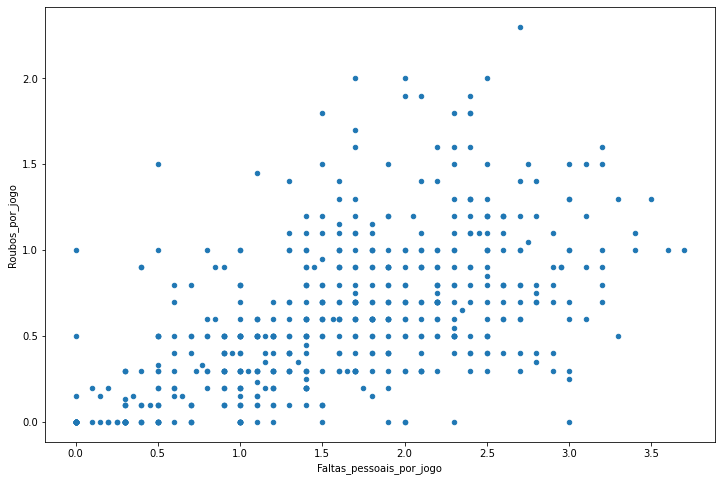

In [ ]:
roubos.plot.scatter(figsize=(12,8), y='Roubos_por_jogo', x='Faltas_pessoais_por_jogo')

Há certa linearidade em que os paramentros de roubo e tocos altos tendem a levar a mais faltas

# ANÁLISE 3

POSIÇÕES:

C: Pivô,
PF: Ala-pivô,
SG: Ala-armador,
PG: Armador,
SF: Ala,

Retirar time TOT, que é repetição de outros (consolidação)

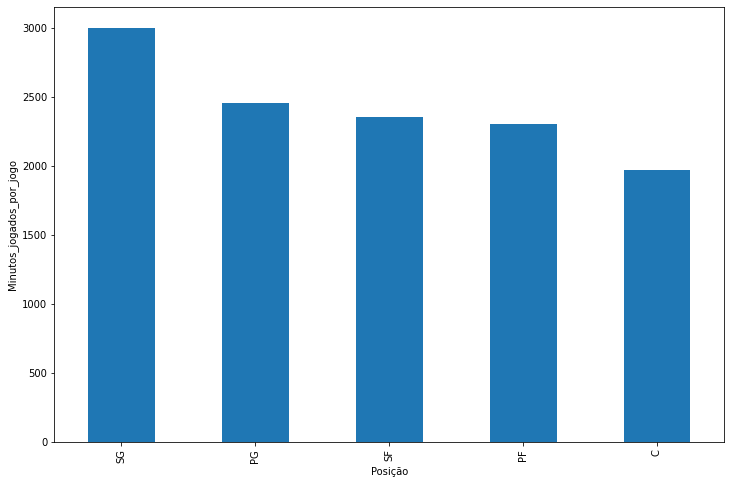

In [ ]:
df.loc[sem_equipe_TOT].groupby(["Posição"])['Minutos_jogados_por_jogo'].sum().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Posição',ylabel='Minutos_jogados_por_jogo')

Ala-armadores ficam mais em campo que os outros por uma margem considerável de aproximadamente 500 minutos. Uma razão esperada é por eles costumeiramente também serem os maiores pontuadores de acordo com a analise 1.